Fall 2019 DATA 622 # hw3. As provided on the intructions of the home work, home work 3 highly depends on the the work done on home work 2. 

In [7]:
%matplotlib inline

import pandas as pd
train_df = pd.read_csv('https://github.com/cuny-sps-msda-data622-2019fall/hw2-jonygeta/blob/master/train.csv')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As we can observe there are 12 columns in the training data.For the sake of information i woul lik eto provide some keys : PassengerId is meant to identify individual entries. Survived is the target variable. Name and Ticket are meant as a way to identify a passanger.

In [9]:
train_df.drop(['Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

For the sake of ease I have converted -sex to dummy variable as it may have the capacity being a factor.

In [10]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_male       891 non-null uint8
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


There are 6 numeric variables that can be used in modeling while _Age is the missing value .


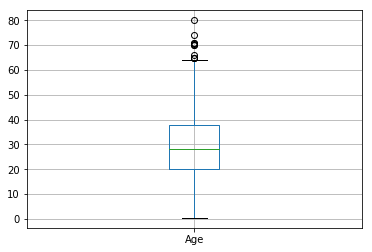

In [14]:
train_df.boxplot('Age')


I would like to make a note here that mmissing values are replaced with the mean .

In [17]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean', axis=0)
train_df2 = imp.fit_transform(train_df)
train_df2 = pd.DataFrame(data=train_df2, columns=train_df.columns.values)
for column in train_df2:
    train_df2[column] = train_df2[column].astype(train_df[column].dtype.name)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_male       891 non-null uint8
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


In [19]:
train_df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
dtype: int64

No missing values.

In [20]:
train_df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [24]:
train_df2.groupby('Survived').count()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
Survived,,,,,,
0,549,549,549,549,549,549
1,342,342,342,342,342,342


As we can see Fare and Pclass would influence survival rates. Number of siblings, Sex and age can be included as factors as well.

In [21]:
train_df = train_df2
train_df.drop(['PassengerId'], axis=1, inplace=True)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = train_df['Survived'].values
X = train_df.drop('Survived', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=38)
logreg = LogisticRegression(C=0.1931, penalty='l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93  7]
 [27 52]]
             precision    recall  f1-score   support

          0       0.78      0.93      0.85       100
          1       0.88      0.66      0.75        79

avg / total       0.82      0.81      0.80       179




Logistic regression is used for my modeling as it can show a reasonbale results.

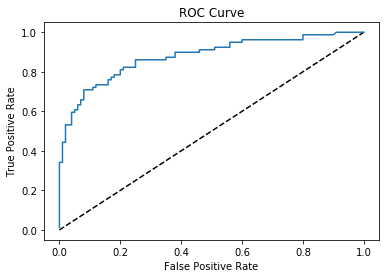

In [25]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
import numpy as np

c_space = np.logspace(-5, 5)
param_grid = {'C': c_space, 'penalty': ['l1','l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.19306977288832497, 'penalty': 'l2'}
Best score is 0.7946127946127947
